In [11]:
import sys
sys.path.append('../')
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('Data/aftercorona.csv', sep = ',')
data.head()

,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,site
0,2.730776e+07,50931,AppelquistP,Damn I thought I was finally in the #Matrix or...,0,OZ,18/06/2021,130,False,0,NaN,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json
1,2.880588e+09,27578,kaarnama13,â€œNosediveâ€ episode from #blackmirror gets ...,0,Aage se right,18/06/2021,669,False,6,NaN,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json
2,2.370116e+09,115767,Niggvtivity,I've just watched episode S03 | E05 of Black M...,0,"Bonneuil-sur-Marne, France",18/06/2021,795,False,0,NaN,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json
3,4.817271e+07,4971,DystopicRedhead,The perfect description of the #Tories and the...,4,United Kingdom,18/06/2021,2117,False,8,NaN,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json
4,1.402080e+18,13,smash_media_us,ã€ #ONEUS Ã— #smash. ã€‘\r\n\r\nONEUS is on n...,0,NaN,18/06/2021,762,False,5,NaN,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json


In [4]:
shuffled_df = data.sample(frac=1, random_state= 42) # shuffle data for random tweets to look at

In [5]:
 # filter out 50 first tweets from shuffled data
 shuffled_df.iloc[0:50]#.to_csv('Data/vader_eval.csv') 

In [15]:
#read in the vader data frame for evaluation
data = pd.read_csv('Data/Vader_Eval_Original.csv', sep = ',')

In [16]:
# change compound from continous to categorical variable 
data["compound"] = np.where(data["compound"] >= 0.05, 1, data["compound"])
data["compound"] = np.where(data["compound"] <= -0.05, -1, data["compound"])
data["compound"] = np.where((data["compound"] > -0.05) & (data["compound"] < 0.05), 0, data["compound"])

In [17]:
data.head()

,Unnamed: 0,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,site,tweet_vader,compound
0,0,2.730776e+07,50931,AppelquistP,Damn I thought I was finally in the #Matrix or...,0,OZ,18/06/2021,130,False,0,NaN,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json,Damn thought finally #Matrix #blackmirror #Ali...,0.0
1,1,2.880588e+09,27578,kaarnama13,â€œNosediveâ€ episode from #blackmirror gets ...,0,Aage se right,18/06/2021,669,False,6,NaN,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json,â€œNosediveâ€ episode #blackmirror gets close...,0.0
2,2,2.370116e+09,115767,Niggvtivity,I've just watched episode S03 | E05 of Black M...,0,"Bonneuil-sur-Marne, France",18/06/2021,795,False,0,NaN,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json,I've watched episode Black Mirror! #BlackMirro...,0.0
3,3,4.817271e+07,4971,DystopicRedhead,The perfect description of the #Tories and the...,4,United Kingdom,18/06/2021,2117,False,8,NaN,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json,The perfect description #Tories voters favouri...,1.0
4,4,1.402080e+18,13,smash_media_us,ã€ #ONEUS Ã— #smash. ã€‘\r\n\r\nONEUS is on n...,0,NaN,18/06/2021,762,False,5,NaN,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json,ã€ #ONEUS #smash. ã€‘ ONEUS smash.â£ï¸ New ...,1.0


In [10]:
shuffled_df[shuffled_df.index == 2087] 

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot
2087,1,1200528183164067841,25959,ToskaBoy,@FriedhofchiIIer Boohoo soll doch in Rente gehen,0,,08-Apr-2021,251,False,3.0,1.380103e+18,boohoo,de,boohoo soll doch rente gehen,Boohoo soll doch Rente gehen,0.0,boohoo soll doch rente gehen,False


In [11]:
# inner merge for only data with vader and manual sentiment, merging on indexes

merged_df = pd.merge(shuffled_df, df, right_on='Unnamed: 0', left_index=True, how = 'inner') # Unnamed is here the old index for some reason

In [12]:
merged_df = merged_df.drop(['Unnamed: 0'], axis = 1) # afterwards we can drop it, as we have the original index from the left dataset

In [13]:
merged_df = merged_df.drop('index', axis = 1).reset_index().drop('index', axis = 1).reset_index() # same for the index and we can reset everything

In [14]:
merged_df.Sentiment = merged_df.Sentiment.astype('float64') # changing Sentiment to float

In [15]:
merged_df.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot,Sentiment
0,0,1358102479657967618,3586,localbunnybitch,@whosmartinn Achsooooo ja hm\nAlso bei vinted ...,0,she/her,01-Mar-2021,207,False,2.0,1.366471e+18,asos,de,achsooooo hmalso bei vinted sind immer ganz ni...,Achsooooo hmAlso bei vinted sind immer ganz ni...,1.0,achsooooo hmalso bei vinted sein immer ganz ni...,False,1.0
1,1,1027214204,67514,JudicatorPredo,"@undalles0yeah @isi_peazy Weiß gar nicht, ob Z...",0,Mitte des Flusses,12-Apr-2021,314,False,1.0,1.381686e+18,zalando,de,weiß gar nicht zalando überhaupt schwarze zahl...,"Weiß gar nicht, Zalando überhaupt schwarze Zah...",0.0,weiß gar nicht zalando überhaupt schwarze zahl...,False,0.0
2,2,33618241,7969,cyclist_city,@Zalando_Press @Vizions2017 Super! Warum nicht...,0,"Berlin, Germany",02-Mar-2021,1223,False,3.0,NaN,zalando,de,super warum nicht eurer heimat berlin,Super! Warum nicht eurer Heimat Berlin?,1.0,super warum nicht eurer heimat berlin,False,1.0
3,3,23059415,14583,birgitzz,"Von wegen, Umsatzeinbruch während Corona --&gt...",2,"Zurich, Switzerland",15-Mar-2021,1280,False,2.0,NaN,zalando,de,von wegen umsatzeinbruch während corona zaland...,"Von wegen, Umsatzeinbruch während Corona --&gt...",0.0,von wegen umsatzeinbruch während corona zaland...,False,1.0
4,4,1250097593612472322,1868,zItzMatze,"@aycaxkaya asos, die hatten da zwei übelst nic...",0,bei mir zu hause,04-Apr-2021,31,False,1.0,1.378645e+18,asos,de,asos die hatten zwei übelst nice tshirts,"asos, die hatten zwei übelst nice tshirts",0.0,asos der haben zwei übelst nice tshirts,False,1.0


In [16]:
# column 'compound' from vader -> predicted values
# column 'Sentiment' own labelled data -> true values
# in order to determine the correctness of vader's sentiment evaluation we can use the confusion matrix to determine the false postives and negatives.

con_mat = pd.crosstab(merged_df.compound, merged_df.Sentiment, rownames=['compound'], colnames=['Sentiment'])
print(con_mat)

Sentiment  -1.0   0.0   1.0
compound                   
-1.0         33    20    14
 0.0         29    68    32
 1.0          1     1     7


True Positive (TP) 

    The predicted value matches the actual value
    The actual value was positive and the model predicted a positive value

True Negative (TN) 

    The predicted value matches the actual value
    The actual value was negative and the model predicted a negative value

False Positive (FP) – Type 1 error

    The predicted value was falsely predicted
    The actual value was negative but the model predicted a positive value
    Also known as the Type 1 error

False Negative (FN) – Type 2 error

    The predicted value was falsely predicted
    The actual value was positive but the model predicted a negative value
    Also known as the Type 2 error


In [17]:
from sklearn.metrics import multilabel_confusion_matrix

In [18]:
print(multilabel_confusion_matrix(merged_df.compound, merged_df.Sentiment))

[[[108  30]
  [ 34  33]]

 [[ 55  21]
  [ 61  68]]

 [[150  46]
  [  2   7]]]


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Sentiment', ylabel='compound'>

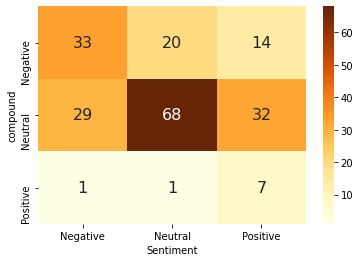

In [20]:
cm = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, xticklabels = ['Negative', 'Neutral','Positive'], yticklabels = ['Negative', 'Neutral','Positive'], cmap = cm)


In [21]:
#classification_report
# wordclouds zalando, asos and boohoo englisch nouns -> done
# add colorscheme for every plot -> done
#  add screenshot of excel -> done
# look up how tags work
# look up how vader works


In [23]:
print(classification_report(merged_df.compound, merged_df.Sentiment))

              precision    recall  f1-score   support

        -1.0       0.52      0.49      0.51        67
         0.0       0.76      0.53      0.62       129
         1.0       0.13      0.78      0.23         9

    accuracy                           0.53       205
   macro avg       0.47      0.60      0.45       205
weighted avg       0.66      0.53      0.57       205

